## 1. La legge dei grandi numeri

La legge dei grandi numeri è un teorema fondamentale della teoria della probabilità che indica che se ripetiamo molte volte (tendendo all'infinito) lo stesso esperimento, la frequenza di un certo evento tende ad essere costante.

Vale a dire, **la legge dei grandi numeri indica che se lo stesso test viene eseguito ripetutamente (ad esempio, lancio di una moneta), la frequenza con cui si ripeterà un determinato evento (testa/croce) si avvicinerà a una costante. Questa a sua volta sarà la probabilità che questo evento si verifichi.**

Fonte: https://it.economy-pedia.com/11038376-law-of-the-big-numbers

- Scrivere una funzione che simula il lancio di una moneta per N volte e restituisce la frequenza % di volte che è uscita testa.
- Calcolare la frequenza % con la grandezze del campione (numero di lanci) che varia 100 volte da 10 a 20000. Ottengo quindi 100 valori.
- Fare il plot del Numero medio di teste (y) rispetto alla grandezza del campione (x)





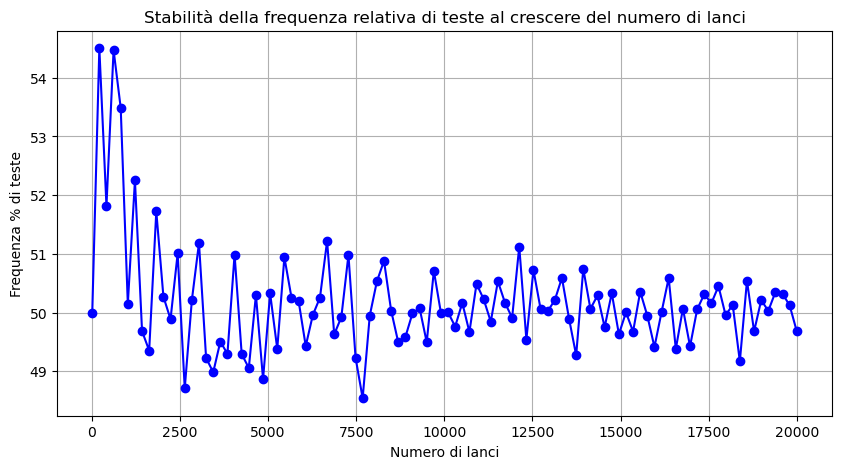

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Funzione che simula il lancio di una moneta N volte e restituisce la % di teste
def frequenza_teste(N):
    lanci = np.random.choice([0, 1], size=N, p=[0.5, 0.5])  # 0 = croce, 1 = testa
    return np.mean(lanci) * 100  # frequenza % di teste

# Vettore delle dimensioni dei campioni (da 10 a 20000, 100 valori)
dimensioni = np.linspace(10, 20000, 100, dtype=int)
frequenze_teste = []

# Calcolo della frequenza % per ogni dimensione
for n in dimensioni:
    freq = frequenza_teste(n)
    frequenze_teste.append(freq)

# Plot dei risultati
plt.figure(figsize=(10, 5))
plt.plot(dimensioni, frequenze_teste, marker='o', linestyle='-', color='blue')
plt.xlabel("Numero di lanci")
plt.ylabel("Frequenza % di teste")
plt.title("Stabilità della frequenza relativa di teste al crescere del numero di lanci")
plt.grid(True)
plt.show()


## 2. Analisi del Dataset Titanic
- Quante righe e colonne ha il dataset?
- Controlla quanti valori mancanti ci sono per colonna
- Riempi i valori mancanti nella colonna 'Embarked' con il valore più frequente
- Rimuovi le righe dove il valore di 'Age' è mancante
- Controlla se ci sono righe duplicate
- Calcola l'età media dei passeggeri per ogni classe (`Pclass`), se ci sono valori mancanti di età riempili con il valore medio
- Visualizza la distribuzione dell'età per classe
- Visualizza la distribuzione dell'età per classe dividendo e mmostrando insieme i dati di uomini e donne

In [75]:
# 📦 Caricamento del dataset
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df = pd.read_csv(url)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Dimensione dataframe Titanic e' (714, 12)
Colonne con valori mancanti: 2
Righe duplicate: 0


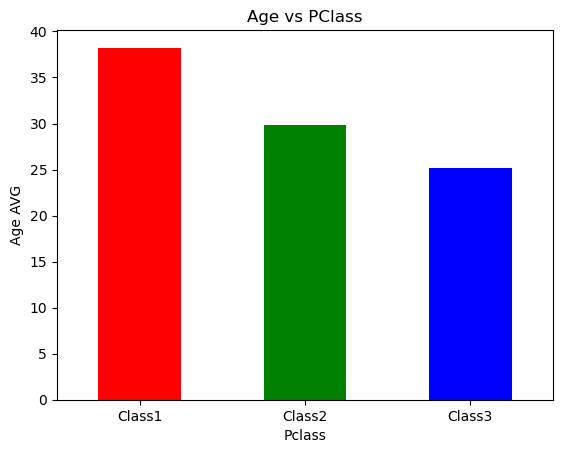

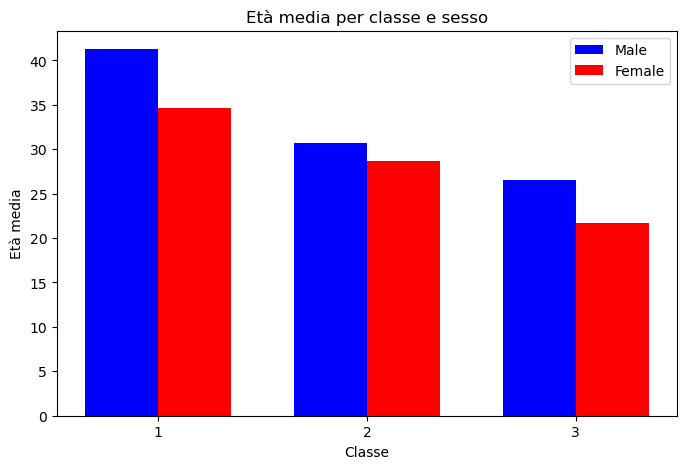

In [77]:
print(f"Dimensione dataframe Titanic e' {df.shape}")

colonne_valori_mancanti = sum(df.count() < df.shape[0])
print(f"Colonne con valori mancanti: {colonne_valori_mancanti}")

valore_frequente = df['Embarked'].value_counts().sort_values(ascending=False).head(1)
df['Embarked'].fillna(value=f'{valore_frequente.index}')

df.dropna(subset='Age', axis=0, inplace=True)

print(f"Righe duplicate: {sum(df.value_counts()>1)}")

df['Age'].fillna(value=df['Age'].mean())
age_class_df = df.groupby('Pclass').agg(eta_media=('Age','mean'))
ax = age_class_df.plot(y='eta_media', color=['r','g','b'], kind='bar', title='Age vs PClass', legend=None, ylabel="Age AVG")
ax.set_xticklabels(labels=['Class1', 'Class2', 'Class3'],rotation=0)
plt.show()




class_sex_age = df.pivot_table(index='Pclass', columns='Sex', values='Age', aggfunc='mean')
fig, ax = plt.subplots(figsize=(8,5))

posizioni_m = np.arange(len(class_sex_age))       
posizioni_f = posizioni_m + 0.35            
ax.bar(posizioni_m, class_sex_age['male'], width=0.35, color='blue', label='Male')
ax.bar(posizioni_f, class_sex_age['female'], width=0.35, color='red', label='Female')
ax.set_xticks(posizioni_m + 0.35 / 2)            
ax.set_xticklabels(class_sex_age.index)    
ax.set_xlabel('Classe')
ax.set_ylabel('Età media')
ax.set_title('Età media per classe e sesso')
plt.legend()
plt.show()


## 3. Analisi del Dataset Iris

- Esplora la distribuzione delle specie (conta quanti campioni ci sono per specie)
- Calcola la lunghezza e la larghezza media dei petali per specie
- Visualizza le dimensioni dei petali per specie (scatterplot)
- Crea una nuova colonna per l'area del petalo e analizzala
- Grafico della distribuzione dell'area del petalo per specie (boxplot)

In [78]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

url = "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv"
df = pd.read_csv(url)
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


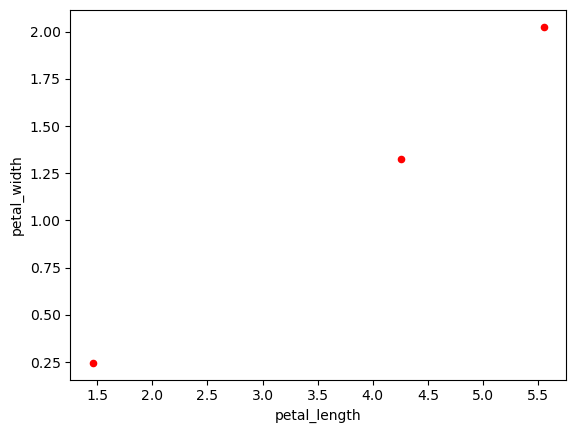

<Axes: xlabel='species', ylabel='petal_area'>

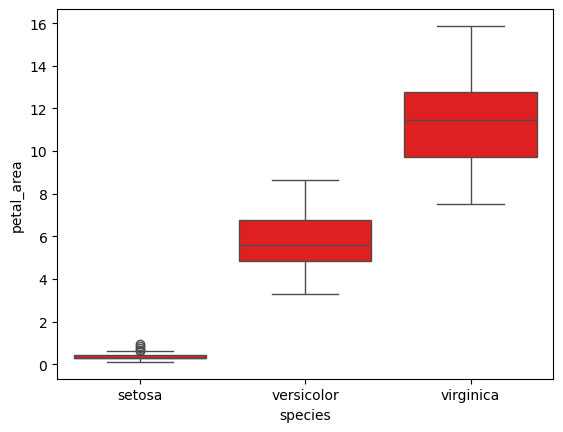

In [87]:
df['species'].value_counts()

df2 = df.groupby('species')[['petal_length','petal_width']].mean()
df2.plot(x='petal_length', y='petal_width', color='r', kind='scatter', marker='o')
plt.show()

df['petal_area'] = df['petal_width'] * df['petal_length']
df.groupby('species').agg(
    pet_area_mean=('petal_area', 'mean'),
    pet_area_max=('petal_area', 'max'),
    pet_area_min=('petal_area', 'min'),
    pet_area_sum=('petal_area', 'sum'),
    pet_area_std=('petal_area', 'std')
)

sns.boxplot(data=df, x='species', y='petal_area', color='r')
